In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math

matplotlib.rcParams.update({'font.size': 14})

In [6]:
df = pd.read_csv("RawTrafficData.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [7]:
base_series = df.value
time = np.arange(0, len(base_series), 1) 
start_index = math.floor((1/2)*len(df.value))

proportion_anomalies = 0.01
num_anomalies = int((len(time) - start_index) * proportion_anomalies)

anomalous_series = base_series.copy()

#Positive Point Anomalies
p_anomaly_indices = np.random.choice(range(start_index, len(time)), num_anomalies, replace=False)
anomaly_amplitudes = np.random.uniform(0.5, 2.0, num_anomalies)

anomalous_series.iloc[p_anomaly_indices] += anomaly_amplitudes

#Negative Point Anomlaies
n_anomaly_indices = np.random.choice(range(start_index, len(time)), num_anomalies, replace=False)
anomaly_amplitudes = np.random.uniform(-2.0, -0.5, num_anomalies)

anomalous_series.iloc[n_anomaly_indices] += anomaly_amplitudes

anomaly_indices = np.append(p_anomaly_indices, n_anomaly_indices)

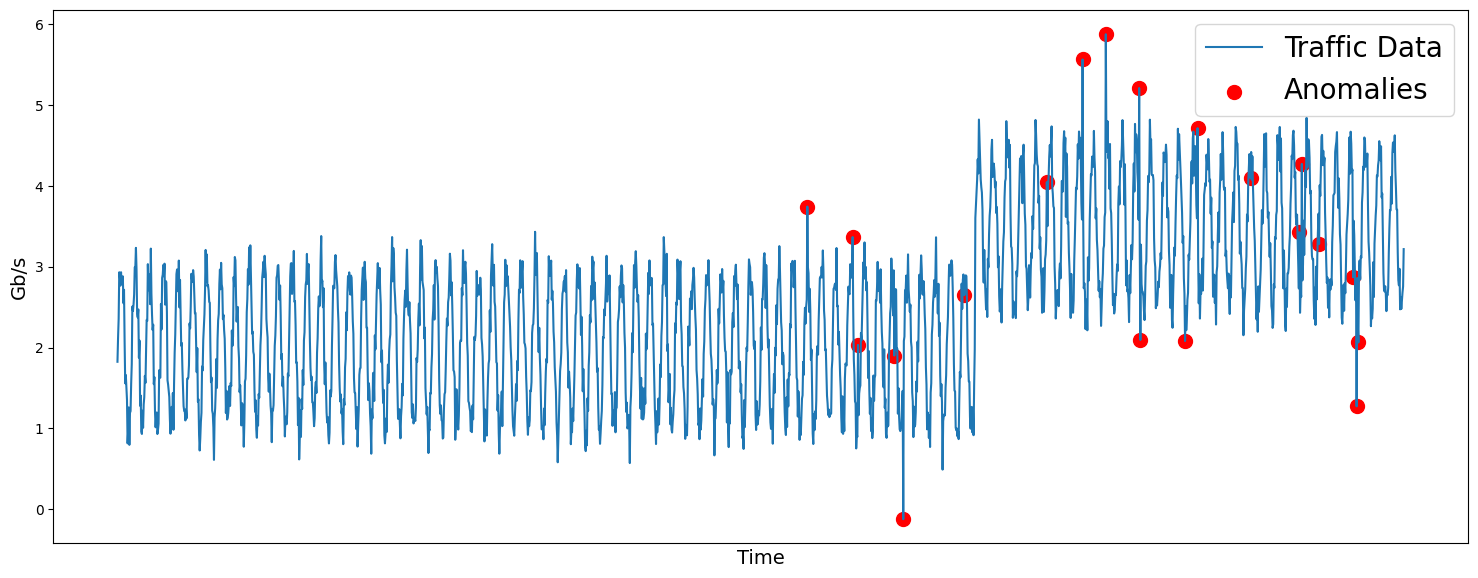

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
#axs.plot(df.index, df.value, label = "Traffic Data")
plt.plot(time, anomalous_series, label='Traffic Data')
plt.scatter(anomaly_indices, [anomalous_series.iloc[idx] for idx in anomaly_indices], color='red', marker='o', s=100, label='Anomalies')
#plt.scatter(n_anomaly_indices, [anomalous_series.iloc[idx] for idx in n_anomaly_indices], color='red', marker='o', s=100, label='Anomalies')
axs.legend(fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Gb/s')
plt.xlabel('Time')
plt.xticks([])
plt.tight_layout()
plt.savefig('./GeneratedPlots/AnomalousSeries.png') 
plt.show()

In [11]:
df['Anomalie_Data'] = anomalous_series
df['Anomalous'] = 0
df.iloc[anomaly_indices, df.columns.get_loc('Anomalous')] = 1
df.head()

,value,Anomalie_Data,Anomalous
2023-09-01 00:00:00,1.825067,1.825067,0
2023-09-01 01:00:00,2.121939,2.121939,0
2023-09-01 02:00:00,2.357743,2.357743,0
2023-09-01 03:00:00,2.932698,2.932698,0
2023-09-01 04:00:00,2.886991,2.886991,0
